# NLP: Sentiment Classification

In this project, I will be investigating NLP methods for distinguishing positive and negative reviews written about movies.


In [ ]:
#preliminary imports
import re
import nltk
import string
import random
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from itertools import zip_longest
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.classify.api import ClassifierI
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
#set up nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

In [4]:
#do not change the code in this cell
id= 2023
random.seed(id)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['the', 'start', 'of', 'this', 'movie', 'reminded', ...], 'pos')


# Part1:

a) **Generate** a list of 10 content words which are representative of the positive reviews in the training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in the training data.


In [5]:
sia = SentimentIntensityAnalyzer()
stemmer = PorterStemmer()
stop = stopwords.words('english')

In [6]:
# Define a function 'normalise'
def normalise(wordlist):
    # Convert all words in the wordlist to lowercase to ensure uniformity
    lowered = [word.lower() for word in wordlist]
    # Filter out non-alphabetic words and words that are in the stopwords list
    filtered = [word for word in lowered if word.isalpha() and word not in stop]
    return filtered

# Define a function 'most_frequent_words'
def most_frequent_words(posfreq, negfreq, topk, pos_neg):
    # The frequency difference will be taken from posfreq and negfreq
    difference = posfreq - negfreq
    # Then from frequency difference, most_common function from NLTK will be applied to sort the squence in descending order.
    sorteddiff = difference.most_common()
    # An empty list to store the result from the below filtering mechanism
    lit = []
    for word, _ in sorteddiff:
        #lem_word = wordnet_lemmatizer.lemmatize(word)
        stemmed_word = stemmer.stem(word) # Here, I chose stem over lem is because stem provides more various word range.
        # I used polarity_scores value the word sensitity and the threshould is 0.1 and -0.1 when applied in pos and neg respectively.
        if stemmed_word not in lit and pos_neg == 'pos' and sia.polarity_scores(stemmed_word)['compound'] > 0.1:
            lit.append(stemmed_word)
            if len(lit) == topk:
                break
        elif stemmed_word not in lit and pos_neg == 'neg' and sia.polarity_scores(stemmed_word)['compound'] < -0.1:
            lit.append(stemmed_word)
            if len(lit) == topk:
                break
    return lit

In [7]:
# Process the training data by normalizing each wordlist and associating it with its corresponding label.
# 'FreqDist' computes the frequency distribution of the words in the wordlist after normalization.
training_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in training_data]
testing_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in testing_data]

# The pos_freq_dist and neg_freq_dist are created to store all the pos and neg data from training_norm.
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()
for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

# most_frequent_words function will be applied to get the choose of positive and negative words to represent of the training data.
my_positive_word_list=most_frequent_words(pos_freq_dist,neg_freq_dist,10,'pos')
print(f" my_positive_word_list : {my_positive_word_list}" )
my_negative_word_list=most_frequent_words(neg_freq_dist,pos_freq_dist,10,'neg')
print(f" my_negative_word_list : {my_negative_word_list}" )


 my_positive_word_list : ['great', 'best', 'well', 'love', 'true', 'perfect', 'excel', 'friend', 'solid', 'strong']
 my_negative_word_list : ['bad', 'worst', 'stupid', 'bore', 'poor', 'dull', 'mess', 'problem', 'lame', 'fail']


Two lists for movie sentiment analysis have been generated – one representing positive feedback and the other for negative feedback. 

Each list contains 10 words.

#### Process: 
- Libraries import:
    1. `from nltk.sentiment import SentimentIntensityAnalyzer` (Applied in the `most_frequent_words` function to filter the word representatives.)
       The positive word will be chosen if the word sensitivity is higher than 0.1 and the negative word will be chosen if the word sensitivity is lower than -0.1.

    2. `from nltk.stem import PorterStemmer` (Used before `SentimentIntensityAnalyzer` to normalise words such as from killing and killed to kill. However, in this case, our goal is to match the exact same word for the classifier which we will create later so it doesn't provide much improvement in performance. I chose Stemming  over lemmatization function because stem aims to cut off word endings to achieve the goal of reducing words to a common base form. (Otherwise, we would get killed or killing...).
    
- Construct the `most_frequent_words` function:
    1. This function takes four inputs: `posfreq`, `negfreq`, `topk`, `pos_neg`. The first two are `pos_freq_dist` and `neg_freq_dist` lists from the `training_norm`. The third is the amount of words to be chosen from the function, and the fourth is to decide which representatives (pos or neg) will be generated. The function first takes the difference from `posfreq` and `negfreq`. Then it conducts `most_common` from NLTK. Inside the for loop, the function will value each word's sensitivity score and if `compound` passes the threshold (0.1 for pos, -0.1 for neg), then the word will be stored in `lit` which will be the output later. The loop will stop once the top 10 words are found.

- Data Normalisation:

    1. Normalising `training_data` and `testing_data` by cleaning all the stop words and lowering words in the data. Tuple is used to include both the wordlist and label in the data to ensure the original label from the wordlist. Everything is conducted within a list comprehension which is a Pythonic way to code.

- Pos & Neg wordlist:
    1. Here, a loop is performed to store the value (wordlist and frequency) from the `training_norm` to `pos_freq_dist` and `neg_freq_dist` according to its label.

- Function call:
    After calling the `most_frequent_words` with pos and neg labels, this is the result:
    1. `my_positive_word_list`: ['great', 'well', 'best', 'love', 'true', 'perfect', 'strong', 'excel', 'brilliant', 'good']
    2. `my_negative_word_list`: ['bad', 'worst', 'bore', 'stupid', 'mess', 'dull', 'poor', 'annoy', 'dumb', 'fail']

- Finding:
    1. The more meaningful words into my_positive_word_list and my_negative_word_list, the more accaurcy will be yield before exhaustion.
    2. The increase in threshold for `polarity_scores` might also yield a better accaurcy result. Further experiements require.

# Part2:

a) **Use** the lists generated ealier to build a **word list classifier** which will classify reviews as being positive or negative.


In [8]:
# Define a class SimpleClassifier that inherits from NLTK's ClassifierI class.
class SimpleClassifier(ClassifierI): 
    # Initializer with positive and negative word lists as parameters.
    def __init__(self): 
        # Store the positive and negative word lists in the instance.
        pass
    '''
    def __init__(self, pos, neg): 
        # Store the positive and negative word lists in the instance.
        self._pos = pos 
        self._neg = neg 
    '''
    def most_frequent_words(self,posfreq, negfreq, topk, pos_neg):
        if not (isinstance(posfreq, FreqDist) and isinstance(negfreq, FreqDist)):
            raise ValueError("posfreq and negfreq must be instances of FreqDist")
        # The frequency difference will be taken from posfreq and negfreq
        difference = posfreq - negfreq
        # Then from frequency difference, most_common function from NLTK will be applied to sort the squence in descending order.
        sorteddiff = difference.most_common()
        # An empty list to store the result from the below filtering mechanism
        self.lit = []
        for word, _ in sorteddiff:
            #lem_word = wordnet_lemmatizer.lemmatize(word)
            stemmed_word = stemmer.stem(word) # Here, I chose stem over lem is because stem provides more various word range.
            # I used polarity_scores value the word sensitity and the threshould is 0.1 and -0.1 when applied in pos and neg respectively.
            if stemmed_word not in self.lit and pos_neg == 'pos' and sia.polarity_scores(stemmed_word)['compound'] > 0.1:
                self.lit.append(stemmed_word)
                if len(self.lit) == topk:
                    break
            elif stemmed_word not in self.lit and pos_neg == 'neg' and sia.polarity_scores(stemmed_word)['compound'] < -0.1:
                self.lit.append(stemmed_word)
                if len(self.lit) == topk:
                    break
        return self.lit
    
    def normalise(self,wordlist):
        # Convert all words in the wordlist to lowercase to ensure uniformity
        lowered = [word.lower() for word in wordlist]
        # Filter out non-alphabetic words and words that are in the stopwords list
        self.filtered = [word for word in lowered if word.isalpha() and word not in stop]
        return self.filtered

    def train(self,data,k):
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()
        for reviewDist,label in data:
            if not isinstance(reviewDist, FreqDist):
                raise ValueError("Each review distribution must be an instance of FreqDist")
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist

        self._pos=self.most_frequent_words(pos_freq_dist,neg_freq_dist,k,'pos')
        self._neg=self.most_frequent_words(neg_freq_dist,pos_freq_dist,k,'neg')

        return self._pos,self._neg

    # Method to classify a document based on the frequency of positive and negative words.
    def classify(self, doc): 
        score = 0
        for word, value in doc.items():
            # If the word is in the positive list, add its frequency to the score.
            if word in self._pos:
                score += value
            # If the word is in the negative list, subtract its frequency from the score.
            if word in self._neg:
                score -= value
        # Return a label based on the final score.
        return "neg" if score < 0 else "pos" 

    # Method to return possible labels of the classifier.
    def labels(self): 
        return ("pos", "neg")

In [9]:
# Instantiate the classifier with lists of positive and negative words.
word_list_classifier = SimpleClassifier()

# normalise training_data and testing_data
training_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in training_data]
testing_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in testing_data]

# Training
my_positive_word_list, my_negative_word_list = word_list_classifier.train(training_norm,10)

# Classify the training and testing data.
training_classifier = [word_list_classifier.classify(word_list) for (word_list, label) in training_norm]
testing_classifier = [word_list_classifier.classify(word_list) for (word_list, label) in testing_norm]

print(f" my_negative_word_list : {my_negative_word_list}" )
print(f" my_positive_word_list : {my_positive_word_list}" )

print(f" training_classifier : {training_classifier}" )
print(f" testing_classifier : {testing_classifier}" )

 my_negative_word_list : ['bad', 'worst', 'stupid', 'bore', 'poor', 'dull', 'mess', 'problem', 'lame', 'fail']
 my_positive_word_list : ['great', 'best', 'well', 'love', 'true', 'perfect', 'excel', 'friend', 'solid', 'strong']
 training_classifier : ['pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 

#### Wordlist Classifier (SimpleClassifier):

SimpleClassifier is built based on all the functions required for classification. Some functions which have been created earlier will be integrated within this class.

1. SimpleClassifier will be initialized without anything passed into the class. This change has been made since the positive and negative representative lists will be generated once the train function is conducted.

2. `most_frequent_words` is the same function that will be used to filter the top 10 words with the sensitivity score. Inside, an error-checking mechanism is embedded to ensure both `posfreq` and `negfreq` are of FreqDist type.

3. `normalise` is the same function which will take care of lowering words and removing stop words.

4. The `train` function is integrated by two functions - pos_freq_dist/neg_freq_dist generation and `most_frequent_words`. Inside, an error-checking mechanism is embedded to ensure `reviewDist` is of FreqDist type. The function will return two lists (`self._pos` & `self._neg`) which represent the positive and negative lists. 

5. `classify` will take in a training dataset and compare all the words with `self._pos` and `self._neg`. Inside the loop, if the word is in the `self._pos`, the score will add the frequency of the word. If the word is in the `self._neg`, the score will subtract the frequency of the word.

6. `labels` will return all the labels for classification.

#### Implementation:

1. First, we construct the `SimpleClassifier` class with the `word_list_classifier` variable name.

2. Normalized data will be created for both the training & testing dataset by applying the `normalise` function in `SimpleClassifier`. The result will be transformed into a FreqDist type. 

3. `my_positive_word_list` and `my_negative_word_list` will be developed from the `train` function in `SimpleClassifier` with the normalized training data and the number of the top words as input.

4. `classify` will classify all the word lists in the document and return the predicted label (positive, negative).

5. Print the result.

# Part3:

a) **Calculate** the accuracy, precision, recall and F1 score of the classifier.

b) See if it will be reasonable to evaluate the classifier in terms of its accuracy? (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

In [10]:
# Define a class named ConfusionMatrix to calculate evaluation metrics for classification.
class ConfusionMatrix:
    # Initialize the class with predictions, gold standard labels, and the class labels.
    def __init__(self, predictions, gold_standard, classes=("pos", "neg")):
        # Unpack the two class labels.
        (self.c1, self.c2) = classes
        # Initialize true positives, false positives, false negatives, and true negatives.
        self.TP = 0
        self.FP = 0
        self.FN = 0
        self.TN = 0
        # Iterate over paired predictions and gold standard labels to compute confusion matrix.
        for p, g in zip(predictions, gold_standard):
            # If the gold standard is class 1 (e.g., 'pos')
            if g == self.c1:
                if p == self.c1:
                    self.TP += 1  # Correctly predicted class 1
                else:
                    self.FN += 1  # Failed to predict class 1
            # If the prediction is class 1 but the gold standard is not
            elif p == self.c1:
                self.FP += 1  # Incorrectly predicted class 1
            else:
                self.TN += 1  # Correctly predicted not class 1 (e.g., 'neg')

    # Method to calculate precision.
    def precision(self):
        # Avoid division by zero if there are no positive predictions.
        if self.TP + self.FP == 0:
            return 0
        # Calculate precision.
        return self.TP / (self.TP + self.FP)

    # Method to calculate recall.
    def recall(self):
        # Avoid division by zero if there are no true positives or false negatives.
        if self.TP + self.FN == 0:
            return 0
        # Calculate recall.
        return self.TP / (self.TP + self.FN)

    # Method to calculate the F1 score.
    def f1(self):
        # Calculate precision and recall for F1 computation.
        precision = self.precision()
        recall = self.recall()
        # Avoid division by zero if precision and recall sum to zero.
        if precision + recall == 0:
            return 0
        # Calculate F1 score.
        return 2 * (precision * recall) / (precision + recall)
    
    # Method to calculate accuracy.
    def accuracy(self):
        # Calculate the total number of observations.
        total_observations = self.TP + self.TN + self.FP + self.FN
        # Avoid division by zero if there are no observations.
        if total_observations == 0:
            return 0
        # Calculate accuracy.
        return (self.TP + self.TN) / total_observations

In [11]:
word_list_classifier = SimpleClassifier()

# normalise training_data and testing_data
training_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in training_data]
testing_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in testing_data]

# Training
my_positive_word_list, my_negative_word_list = word_list_classifier.train(training_norm,10)

# Predictions from the classifier.
prediction = [word_list_classifier.classify(word_list) for (word_list, label) in testing_norm]
right_answer = [label for (word_list, label) in testing_norm]

# Instantiate ConfusionMatrix with the predictions and correct labels.
ConfusionMatrix_reult = ConfusionMatrix(prediction,right_answer)

# Calculate precision,recall,F1 score, and accuracy.
precision = ConfusionMatrix_reult.precision()
recall = ConfusionMatrix_reult.recall()
f1_score = ConfusionMatrix_reult.f1()
accuracy_score = ConfusionMatrix_reult.accuracy()

print(f"accuracy = {accuracy_score:.2f}")
print(f"recall = {recall:.2f}")
print(f"precision = {precision:.2f}")
print(f"f1_score = {f1_score:.2f}")


accuracy = 0.61
recall = 0.93
precision = 0.57
f1_score = 0.70


#### Is it reasonable to evaluate the classifier in terms of its accuracy?

-  Accuracy might be a fair indicator when class distributions are balanced and misclassification costs for different classes are relatively equal. However, it might not be fair with imbalanced classes or differing costs associated with false positives and false negatives.

#### When Accuracy is Not Reasonable:

Imbalanced Classes:
-  In some situations where classes are imbalanced, having merely accuracy for the final decision might be misleading. For instance, consider a medical diagnosis application designed to identify cancer or a rare disease that occurs in 5% of the population. If we have a naive classifier that labels all patients as "not having the disease", the accuracy will achieve 95%. The result will fail to identify any true positive (those who got cancer or a rare disease and have been diagnosed.) In such cases, metrics like precision, recall, and the F1 score provide more meaningful assessments.

Cost-sensitive Classification:
-  In the same situation where a medical diagnosis application was applied to patients to see if they have cancer or a rare disease. A false negative in a detection system could be life-threatening, while a false positive might result in additional tests. Accuracy would not capture this discrepancy, and a more detailed evaluation involving precision, recall, and possibly a cost matrix would be more appropriate.

#### When Accuracy is Reasonable:

Balanced Classes:

-  If it is a balanced class meaning the class is equally represented in a dataset and also the cost for different types of errors is the same, accuracy might be a fair metric. For example, if both positive and negative classes are balanced in a sentiment analysis application, accuracy will not be biased.

General-Purpose Classification:

- Accuracy may suffice to measure effectiveness in basic applications like image classification into general themes (e.g., animals, landscapes, portraits, etc.), where misclassification does not have serious implications.

# Part4:
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of the word list classifier with the Naive Bayes classifier. 

In [12]:
from nltk.classify.api import ClassifierI
import math
class NBClassifier(ClassifierI):
    
    def __init__(self):
        pass
    
    def _set_known_vocabulary(self,training_data):
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def _set_priors(self,training_data):
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def _set_cond_probs(self,training_data):       
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)
    
    def classify(self,doc):
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)
    

In [13]:
#create an instance of an NBClassifier and apply it to the test data
myclassifier=NBClassifier()
myclassifier.train(training_norm)
right_answer = list(label for _, label in testing_norm)

prediction = list(myclassifier.classify_many(doc for (doc,label) in testing_norm))
ConfusionMatrix_reult = ConfusionMatrix(prediction, right_answer)

# Calculate precision, recall, F1 score, and accuracy using the custom ConfusionMatrix class.
precision = ConfusionMatrix_reult.precision()
recall = ConfusionMatrix_reult.recall()
f1_score = ConfusionMatrix_reult.f1()
accuracy_score = ConfusionMatrix_reult.accuracy()

# Print the performance metrics for the NLTK Naive Bayes Classifier.
print("------------------------")
print("nltk NaiveBayesClassifier")
print("------------------------")
print(f"accuracy = {accuracy_score:.2f}")
print(f"recall = {recall:.2f}")
print(f"precision = {precision:.2f}")
print(f"f1_score = {f1_score:.2f}")



word_list_classifier = SimpleClassifier()

# normalise training_data and testing_data
training_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in training_data]
testing_norm = [(FreqDist(word_list_classifier.normalise(wordlist)), label) for (wordlist, label) in testing_data]

# Training
my_positive_word_list, my_negative_word_list = word_list_classifier.train(training_norm,10)

# Predictions from the classifier.
prediction = [word_list_classifier.classify(word_list) for (word_list, label) in testing_norm]
right_answer = [label for (word_list, label) in testing_norm]
# Instantiate the ConfusionMatrix with the predictions and correct labels to calculate performance metrics.
ConfusionMatrix_reult = ConfusionMatrix(prediction, right_answer)

# Calculate precision, recall, F1 score, and accuracy using the custom ConfusionMatrix class.
precision = ConfusionMatrix_reult.precision()
recall = ConfusionMatrix_reult.recall()
f1_score = ConfusionMatrix_reult.f1()
accuracy_score = ConfusionMatrix_reult.accuracy()

# Print the performance metrics for the word list classifier.
print("------------------------")
print("word list classifier")
print("------------------------")
print(f"accuracy = {accuracy_score:.2f}")
print(f"recall = {recall:.2f}")
print(f"precision = {precision:.2f}")
print(f"f1_score = {f1_score:.2f}")
print("------------------------")

------------------------
nltk NaiveBayesClassifier
------------------------
accuracy = 0.81
recall = 0.80
precision = 0.81
f1_score = 0.80
------------------------
word list classifier
------------------------
accuracy = 0.61
recall = 0.93
precision = 0.57
f1_score = 0.70
------------------------



#### word list classifier:
- For the word list classifier, since the number of representatives in both positive and negative lists is only 20, the prediction from the model can't produce high accuracy based on the given representatives. If the number of representatives from the training data increases, the accuracy will also increase. A high recall score indicates that the false negative (Type II errors or FN) rate is really low, and the model has correctly predicted (True Positives or TP) 93% of the time among all the actual data (TP + FN).

#### nltk NaiveBayesClassifier:
- For the NLTK NaiveBayesClassifier, the overall accuracy (0.81) is much higher than that of the word list classifier (0.61). Also, the F1 score yields 10% more than the word list classifier, implying that the NaiveBayesClassifier has outperformed the word list classifier in this case (movie_reviews). However, when comparing the recall rate, we can see that the NaiveBayesClassifier has only correctly predicted 80% of all actual data, meaning more Type II errors have been made.

#### conclusion
- The NaiveBayesClassifier has much higher accuracy than the word list classifier, which is because the model uses all words in the training data to train the model. Unlike the word list classifier, only 20 representative words have been chosen from the training data to train the model.

- The high recall and relatively lower precision suggest that the word list classifier tends to make fewer Type II errors (false negatives) and more Type I errors (false positives). The NaiveBayesClassifier demonstrates strong performance across all metrics, with good accuracy, high recall, high precision, and a strong F1 score. This balance suggests that the NaiveBayesClassifier effectively minimizes both Type I and Type II errors, making it reliable for classifying both positive and negative cases.

# Part5:

a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier. 

b) **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?



## Experiment Design
#### Objective
-  To study how the length of the wordlists affects the performance of a wordlist classifier in a binary text classification task.

#### Data quality
-  For this experiment, a well-balanced dataset containing positive and negative reviews will be employed.

#### Metrics
-  The primary performance metrics would be Accuracy, Precision, Recall, and F1-Score.

#### Design Decisions
-  Variable of Interest: Length of the wordlist (measured as the number of unique words)
-  Control Variables: Dataset, type of text features (unigrams), and algorithmic settings
-  Wordlist Construction: Wordlists will be created using frequency-based sorting of words in the training set. Different lengths (N=50, 100, 200, 400, 600) will be considered.

#### Procedure
1. Divide the dataset into a 70-30 training-testing split.
2. Create wordlists of varying lengths from the training data.
3. Train the wordlist classifier using each wordlist.
4. Test the classifier on the unseen test data.
5. Record the performance metrics.

#### Results and Discussion
-  Upon conducting the experiment, one could hypothesise that as the wordlist length increases, the classifier's performance would also increase up to a point of saturation, beyond which performance may deteriorate due to overfitting or the introduction of noise.

#### Recommendation
-  Based on the experiment, I would generally recommend a Naive Bayes classifier for future work in text classification for the following reasons:

1. Probabilistic Modelling: Naive Bayes offers a probability score for classifications, which can be insightful.
2. Scalability: Naive Bayes classifiers are computationally efficient, which is advantageous in big data scenarios.
3. Feature Independence: Although a simplistic assumption, it often works well for text data.

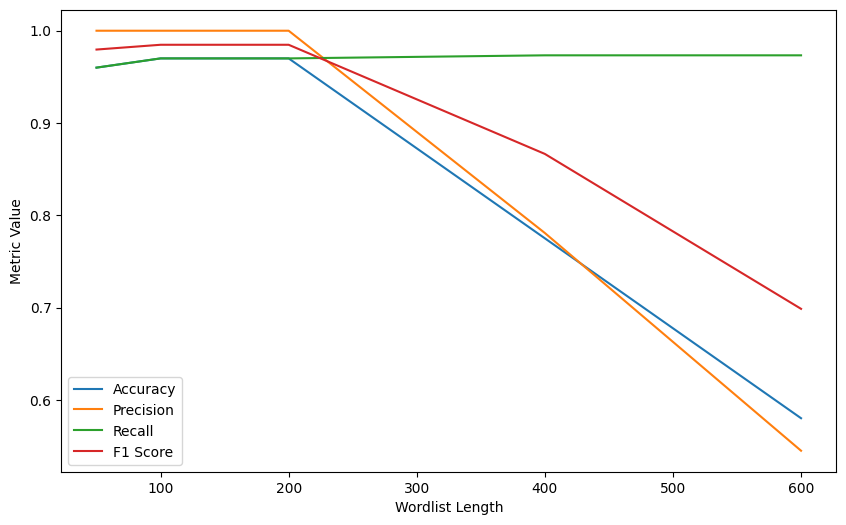

In [14]:
# Retrieve the training and testing datasets.
training_data, testing_data = get_train_test_data()

# Normalize the training data and compute frequency distributions for each wordlist.
training_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in training_data]

# Normalize the testing data and compute frequency distributions for each wordlist.
testing_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in testing_data]

# Initialize a dictionary to store the metrics for each experiment.
metrics = {'length': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Conduct experiments with different sizes of the dataset.
for N in [50, 100, 200, 400, 600]:
    # Limit the training and testing data to the first N elements for the experiment.
    training_norm_test = training_norm[:N]
    testing_norm_test = testing_norm[:N]
    
    # Train the Naive Bayes Classifier with the limited training data.
    word_list_classifier = SimpleClassifier()
    my_positive_word_list, my_negative_word_list = word_list_classifier.train(training_norm,10)
    # Predictions from the classifier.
    prediction = [word_list_classifier.classify(word_list) for (word_list, label) in testing_norm_test]
    # Extract the correct labels from the testing data for evaluation.|
    right_answer = [label for (word_list, label) in testing_norm_test]

    
    # Calculate confusion matrix and evaluation metrics for the current experiment.
    ConfusionMatrix_reult = ConfusionMatrix(prediction, right_answer)
    precision = ConfusionMatrix_reult.precision()
    recall = ConfusionMatrix_reult.recall()
    f1_score = ConfusionMatrix_reult.f1()
    accuracy_score = ConfusionMatrix_reult.accuracy()
    
    # Record the size of the dataset and the computed metrics for this iteration.
    metrics['length'].append(N)
    metrics['accuracy'].append(accuracy_score)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1_score)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(metrics['length'], metrics['accuracy'], label='Accuracy')
plt.plot(metrics['length'], metrics['precision'], label='Precision')
plt.plot(metrics['length'], metrics['recall'], label='Recall')
plt.plot(metrics['length'], metrics['f1'], label='F1 Score')
plt.xlabel('Wordlist Length')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

The graph depicts the performance metrics (Accuracy, Precision, Recall, and F1 Score) against different wordlist lengths.

1. **Precision** & **Accuracy**::
   - Both Precision & accuracy seem to have a sharp peak around the wordlist length of 200 and then drops as the wordlist continues to grow. This suggests that the classifier's false positives initially decrease (improved precision) but then rapidly increase with a longer wordlist.

2. **Recall**:
   - Recall initially decreases slightly and then remains somewhat stable. It suggests that as the wordlist length increases, the classifier's ability to correctly classify instances doesn't substantially improve or deteriorate. 

3. **F1 Score**:
   - The F1 Score, which balances Precision and Recall, shows an improvement peaking at around the wordlist length of 200, and then it declines. This suggests that around a wordlist length of 200, the classifier achieves the best trade-off between Precision and Recall. 

### Analysis:
The wordlist length seems to have an optimal point, roughly at 200, where Precision peaks. Beyond this point, the performance deteriorates, suggesting that a too-extensive wordlist might be introducing noise or overfitting.

Such behaviour indicates that while expanding a wordlist can capture more relevant features (words), it might also introduce irrelevant or noisy ones, thereby adversely affecting the classification.